# Assignment 1: Adam Thompson #

## SYDE556/750 Assignment 1: Representation in Populations of Neurons

- Due Date: January 23rd at midnight
- Total marks: 20 (20% of final grade)
- Late penalty: 1 mark per day
- It is recommended that you use a language with a matrix library and graphing capabilities.  Two main suggestions are Python and MATLAB.
- *Do not use any code from Nengo*

In [560]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## 1) Representation of Scalars

### 1.1) Basic encoding and decoding

Write a program that implements a neural representation of a scalar value $x$.  For the neuron model, use a rectified linear neuron model ($a=max(J,0)$).  Choose the maximum firing rates randomly (uniformly distributed between 100Hz and 200Hz at x=1), and choose the x-intercepts randomly (uniformly distributed between -0.95 and 0.95).  Use those values to compute the corresponding $\alpha$ and $J^{bias}$ parameters for each neuron.  The encoders $e$ are randomly chosen and are either +1 or -1 for each neuron.  Go through the following steps:




In [561]:
class Neuron(object):
    max_fr = 0
    alpha = 0
    jbias = 0
    encoder = 0
    
    def __init__(self):
        self.max_fr = np.random.uniform(low = 100, high = 200) # a @ x = 1
        xint = np.random.uniform(low = -0.95,high = 0.95) # x @ a = 0
        
        self.alpha = self.max_fr/(1-xint) #slope
        self.jbias = -self.alpha * xint #yint
        self.encoder = np.random.uniform(low = -1, high = 1)
        if self.encoder > 0: self.encoder = 1
        else: self.encoder = -1

def initLinearNeurons(n,X):
    A = np.zeros([n,len(X)])
    for i in range(0,n):
        neu = Neuron()
        for j,x in enumerate(X): # for each step dx
            a = neu.encoder * neu.alpha * x + neu.jbias
            A[i][j] = max(a, 0)
    return A

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Plot the neuron responses $a_i$ for 16 randomly generated neurons. (See Figure 2.4 in the book for an example, but with a different neuron model and a different range of maximum firing rates).  
<ul><li>Since you can't compute this for every possible $x$ value between -1 and 1, sample the x-axis with $dx=0.05$.  Use this sampling throughout this question)</li></ul>
</li>
</ol>

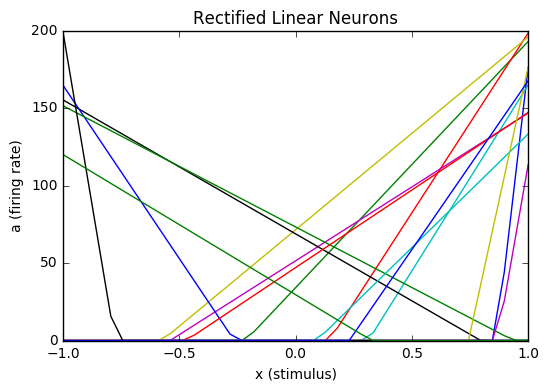

In [562]:
n = 16
stepSize = 0.05
X = np.linspace(-1,1,2/stepSize)

A = initLinearNeurons(n,X)

for i in range(0,n): #for each neuron
    plot(X, A[i])
xlabel('x (stimulus)')
ylabel('a (firing rate)')
title('Rectified Linear Neurons');

<ol style="list-style:lower-alpha outside none;" start="2">
<li> [1 mark] Compute the optimal decoders $d_i$ for those 16 neurons (as shown in class).  Report their values.
<ul><li>The easiest way to compute $d$ is to use the matrix notation mentioned in the course notes.  $A$ is the matrix of neuron activities (the same thing used to generate the plot in 1.1a).
</li></ul>
</li>
</ol>

In [563]:
def decodeNeurons(A):
    Ypsilon = stepSize * np.matmul(A,X)
    Gamma = stepSize * np.matmul(A, np.transpose(A))
    Gamma_inv = np.linalg.inv(Gamma)
    d = np.dot(Gamma_inv, Ypsilon)
    return d

d = decodeNeurons(A)
print "Decoders: \n\n d = " + str(d)

Decoders: 

 d = [  8.32794519e-04   1.08732720e-03   4.02752122e-04   5.57052700e-03
  -1.05923112e-03   5.57322751e-04   8.00826911e-04  -8.67785913e-04
   3.51536429e-03   7.88354366e-04  -4.21180816e-04  -1.50390421e-03
  -2.08392685e-05  -1.98315149e-05  -1.14733949e-03  -1.25944309e-02]


<ol style="list-style:lower-alpha outside none;" start="3">
<li> [1 mark] Compute and plot $\hat{x}=\sum_i d_i a_i$.  Overlay on the plot the line $y=x$.  (See Figure 2.7 for an example).  Make a separate plot of $x-\hat{x}$ to see what the error looks like.  Report the Root Mean Squared Error value.
</li>
</ol>

RMS error = 0.00189068114679


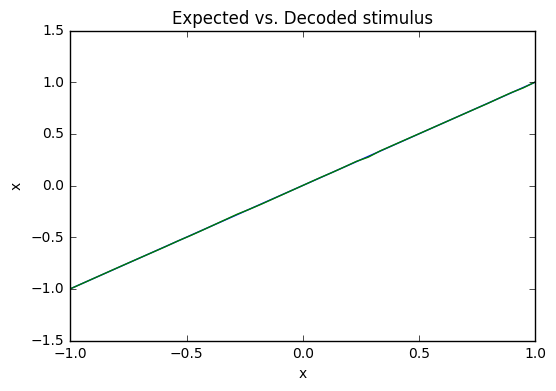

In [564]:
X_hat = np.matmul(A.transpose(),d)

def getRMS(X, X_hat):
    RMS = 0
    Diff = X - X_hat
    for x in range(0,len(X)):
        RMS += np.power(Diff[x],2)
    RMS = np.sqrt(RMS/len(X))
    return RMS, Diff

RMS1, Diff = getRMS(X, X_hat)
print "RMS error = " + str(RMS1)
plot(X, X)
plot(X, X_hat)
xlabel('x')
ylabel('x')
title('Expected vs. Decoded stimulus');

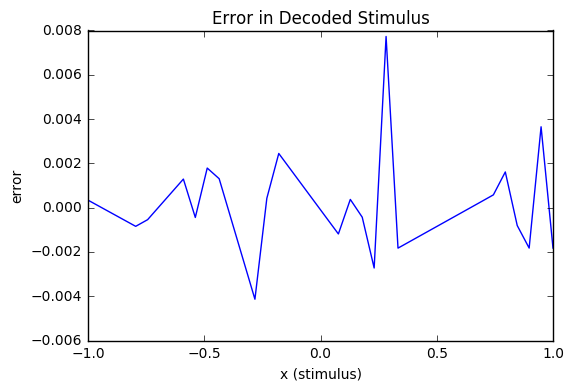

In [565]:
plot(X, Diff)
xlabel('x (stimulus)')
ylabel('error')
title('Error in Decoded Stimulus');

<ol style="list-style:lower-alpha outside none;" start="4">
<li> [1 mark] Now try decoding under noise.  Add random normally distributed noise to $a$ and decode again. The noise is a random variable with mean 0 and standard deviation of 0.2 times the maximum firing rate of all the neurons.  Resample this variable for every different $x$ value for every different neuron.  Create all the same plots as in part c).  Report the Root Mean Squared Error value.
</li>
</ol>

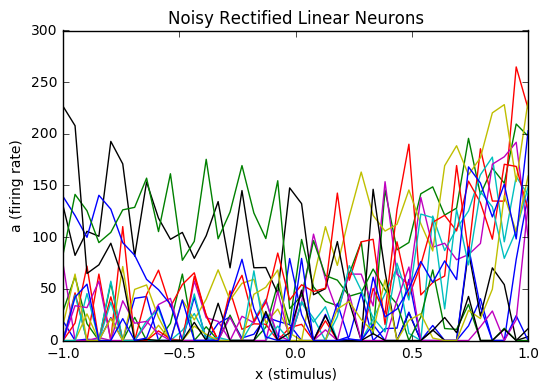

In [566]:
# A_noise = A + np.random.normal(loc = 0, scale = 0.2 * np.max(A), size = A.shape)

def generateNoise(A,std_pct):
#     Anoise = A
    Anoise = A + np.random.normal(loc = 0, scale = 0.2 * np.max(A), size = A.shape)
    for i in range(0,A.shape[0] - 1): #for each neuron
        for j,x in enumerate(X): # for each step in x
#             Anoise[i][j] += np.random.normal(loc = 0, scale = std_pct * np.max(A[i]))
            Anoise[i][j] = max(Anoise[i][j], 0)
    return Anoise

A_noise = generateNoise(A,0.2)
for i in range(0,A.shape[0] - 1): #for each neuron
    plot(X, A_noise[i])
xlabel('x (stimulus)')
ylabel('a (firing rate)')
title('Noisy Rectified Linear Neurons');

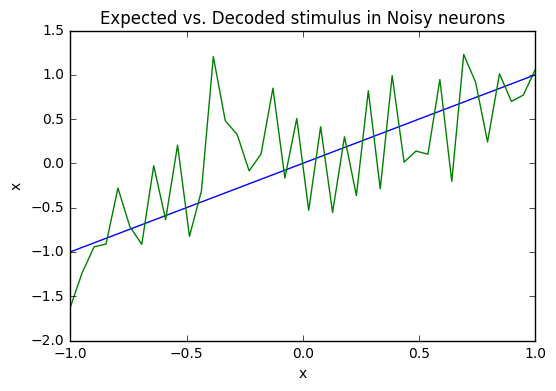

In [567]:
# d_noise = decodeNeurons(A_noise)

X_hat_noise = np.matmul(A_noise.transpose(),d)

plot(X, X)
plot(X, X_hat_noise)
xlabel('x')
ylabel('x')
title('Expected vs. Decoded stimulus in Noisy neurons');

RMS error = 0.527263644973


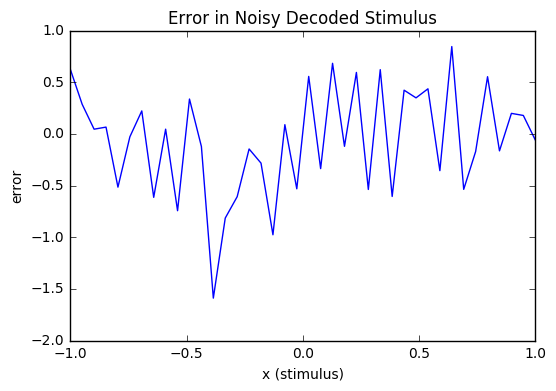

In [568]:
RMS2, Diff_noise = getRMS(X, X_hat_noise)
print "RMS error = " + str(float(RMS2))

plot(X, Diff_noise)
xlabel('x (stimulus)')
ylabel('error')
title('Error in Noisy Decoded Stimulus');

<ol style="list-style:lower-alpha outside none;" start="5">
<li>[1 mark] Recompute the decoders $d_i$ taking noise into account (as shown in class).  Show how these decoders behave when decoding both with and without noise added to $a$ by making the same plots as in c) and d).  Report the RMSE for both cases.
<ul><li>As in the previous question, $\sigma$ is 0.2 times the maximum firing rate of all the neurons.
</li></ul>
</li>
</ol>

RMS error = 0.132889668883


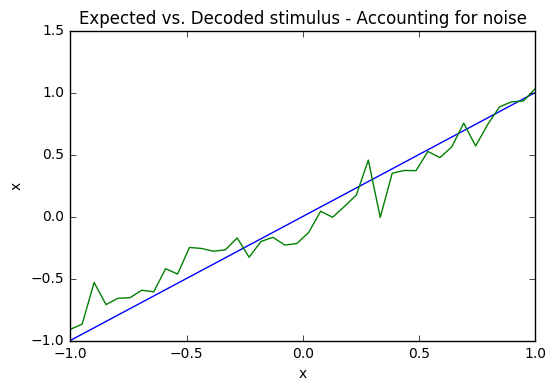

In [569]:
def decodeWithNoise(A):
    Ypsilon = stepSize * np.matmul(A,X)
    Gamma = stepSize * np.matmul(A, np.transpose(A))
    Var = np.power(0.2 * np.max(A),2) * np.identity(A.shape[0])
    Gamma += Var
    Gamma_inv = np.linalg.inv(Gamma)
    d = np.dot(Gamma_inv, Ypsilon)
    return d

d_noise = decodeWithNoise(A_noise)

X_hat_noise = np.matmul(A_noise.transpose(),d_noise)

RMS3, Diff_noise = getRMS(X, X_hat_noise)
print "RMS error = " + str(float(RMS3))

plot(X, X)
plot(X, X_hat_noise)
xlabel('x')
ylabel('x')
title('Expected vs. Decoded stimulus - Accounting for noise');

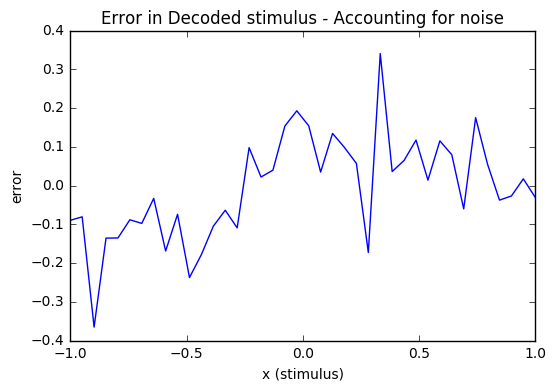

In [570]:
plot(X, Diff_noise)
xlabel('x (stimulus)')
ylabel('error')
title('Error in Decoded stimulus - Accounting for noise');

RMS error = 0.0336920869585


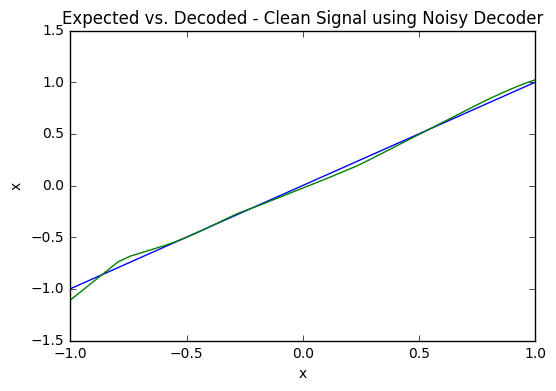

In [571]:
X_hat_clean = np.matmul(A.transpose(),d_noise)

RMS4, Diff_noise = getRMS(X, X_hat_clean)
print "RMS error = " + str(float(RMS4))

plot(X, X)
plot(X, X_hat_clean)
xlabel('x')
ylabel('x')
title('Expected vs. Decoded - Clean Signal using Noisy Decoder');

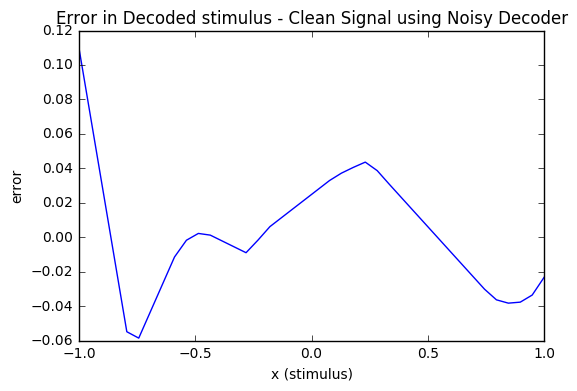

In [572]:
plot(X, Diff_noise)
xlabel('x (stimulus)')
ylabel('error')
title('Error in Decoded stimulus - Clean Signal using Noisy Decoder');

<ol style="list-style:lower-alpha outside none;" start="6">
<li> [1 mark] Show a 2x2 table of the four RMSE values reported in parts c), d), and e).  This should show the effects of adding noise and whether or not the decoders $d$ are computed taking noise into account.  Write a few sentences commenting on what the table shows.
</li>
</ol>

In [573]:
print "Clean Neurons, Original Decoder \nRMS = " + str(RMS1) + "\n"
print "Noisy Neurons, Original Decoder \nRMS = " + str(RMS2) + "\n"
print "Noisy Neurons, Noisy Decoder \nRMS = " + str(RMS3) + "\n"
print "Clean Neurons, Noisy Decoder \nRMS = " + str(RMS4) + "\n"

Clean Neurons, Original Decoder 
RMS = 0.00189068114679

Noisy Neurons, Original Decoder 
RMS = 0.527263644973

Noisy Neurons, Noisy Decoder 
RMS = 0.132889668883

Clean Neurons, Noisy Decoder 
RMS = 0.0336920869585



> This table shows that the lowest RMS error always comes from the noiseless set of neurons. When decoding a noisy signal though, the best RMSE comes from the decoder that takes that noise into account. It also shows that when trying to decode the noiseless neurons using the noisy decoder, we get a worse result than using the original decoder.


### 1.2) Exploring sources of error

Use the program you wrote in 1.1 to examine the sources of error in the representation.

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[2 marks] Plot the error due to distortion $E_{dist}$ and the error due to noise $E_{noise}$ as a function of $N$, the number of neurons. Use the equation with those two parts as your method (2.9 in the book). Generate two different loglog plots (one for each type of error) with $N$ values of [4, 8, 16, 32, 64, 128, 256, 512] (and more, if you would like).  For each $N$ value, do at least 5 runs and average the results.  For each run, different $\alpha$, $J^{bias}$, and $e$ values should be generated for each neuron.  Compute $d$ under noise, with $\sigma$ equal to 0.1 times the maximum firing rate.  Show visually that the errors are proportional to $1/N$ or $1/N^2$ (see figure 2.6 in the book).
</li>
</ol>

In [574]:
def getErrorSources(A):
    d = decodeWithNoise(A)
    X_hat = np.matmul(A.transpose(),d)
    Edist = 0.5 * np.sum((X - X_hat)**2)
    var = 0.2 * np.max(A)**2
    Enoise = var * np.sum(d**2)
    return Edist, Enoise
    
N = [4, 8, 16, 32, 64, 128, 256, 512]
E_dist = np.zeros(len(N))
E_noise = np.zeros(len(N))

for i,n in enumerate(N):
    print "Running n = " + str(n)
    Edist_i = [0] * 5
    Enoise_i = [0] * 5
    for j in range(0,5):
        A_ = initNeurons(n,X)
        Anoise = generateNoise(A_,0.1)
        Ed, En = getErrorSources(Anoise)
        Edist_i += Ed
        Enoise_i += En
    E_dist[i] = np.mean(Edist_i)
    E_noise[i] = np.mean(Enoise_i)
print "OK"

Running n = 4
Running n = 8
Running n = 16
Running n = 32
Running n = 64
Running n = 128
Running n = 256
Running n = 512
OK


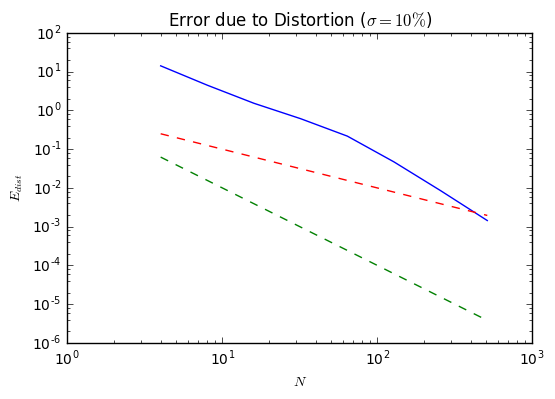

In [575]:
N_inv = [0] * len(N)
N_inv2 = [0] * len(N)
for i,m in enumerate(N):
    N_inv[i] = m**(-1)
    N_inv2[i] = m**(-2)

loglog(N, E_dist)
loglog(N,N_inv, 'r--')
loglog(N,N_inv2, 'g--')
xlabel('$N$')
ylabel('$E_{dist}$')
title('Error due to Distortion ($\sigma = 10\%$)');

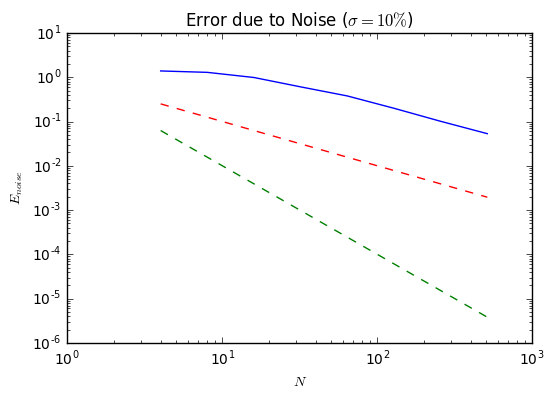

In [576]:
loglog(N, E_noise,'b')
loglog(N,N_inv, 'r--')
loglog(N,N_inv2, 'g--')
xlabel('$N$')
ylabel('$E_{noise}$')
title('Error due to Noise ($\sigma = 10\%$)');

<ol style="list-style:lower-alpha outside none;" start="2">
<li>[1 mark] Repeat part a) with $\sigma$ equal to 0.01 times the maximum firing rate.
</li>
</ol>

In [577]:
E_dist2 = np.zeros(len(N))
E_noise2 = np.zeros(len(N))

for i,n in enumerate(N):
    print "Running n = " + str(n)
    Edist_i = [0] * 5
    Enoise_i = [0] * 5
    for j in range(0,5):
        A_ = initNeurons(n,X)
        Anoise = generateNoise(A_,0.01)
        Ed, En = getErrorSources(Anoise)
        Edist_i += Ed
        Enoise_i += En
    E_dist2[i] = np.mean(Edist_i)
    E_noise2[i] = np.mean(Enoise_i)
print "OK"

Running n = 4
Running n = 8
Running n = 16
Running n = 32
Running n = 64
Running n = 128
Running n = 256
Running n = 512
OK


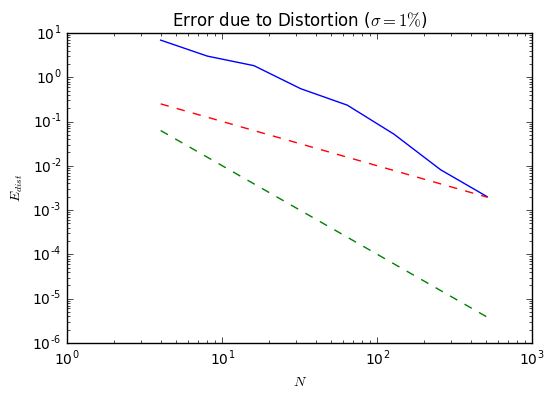

In [578]:
loglog(N, E_dist2)
loglog(N,N_inv, 'r--')
loglog(N,N_inv2, 'g--')
xlabel('$N$')
ylabel('$E_{dist}$')
title('Error due to Distortion ($\sigma = 1\%$)');

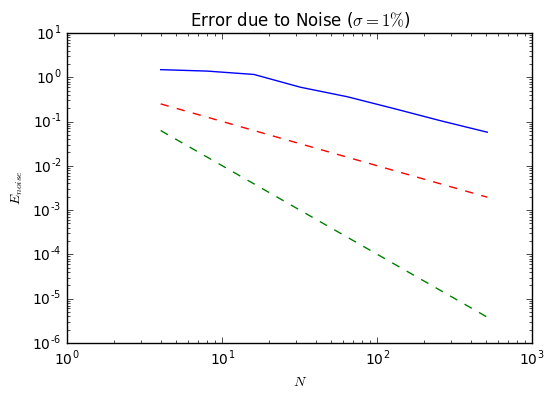

In [579]:
loglog(N, E_noise2,'b')
loglog(N,N_inv, 'r--')
loglog(N,N_inv2, 'g--')
xlabel('$N$')
ylabel('$E_{noise}$')
title('Error due to Noise ($\sigma = 1\%$)');

<ol style="list-style:lower-alpha outside none;" start="3">
<li> [1 mark] What does the difference between the graphs in a) and b) tell us about the sources of error in neural populations?
</li>
</ol>

> The difference between the graphs in a) and b) tells us that as we increase the number of neurons in a population, the error due to noise supercedes the error due to distortion.

### 1.3) Leaky Integrate-and-Fire neurons

Change the code to use the LIF neuron model: 

$$
a_i = \begin{cases}
    {1 \over {\tau_{ref}-\tau_{RC}ln(1-{1 \over J})}} &\mbox{if } J>1 \\ 
    0 &\mbox{otherwise} 
    \end{cases}
$$


In [591]:
def initLIFNeurons(n,X, tau_ref, tau_rc):
    A = np.zeros([n,len(X)])
    for i in range(0,n):
        neu = Neuron()
        for j,x in enumerate(X): # for each step dx
            J = neu.encoder * neu.alpha * x + neu.jbias
            a = (tau_ref - (tau_rc*np.log(1-J**(-1))))**(-1) if (J > 1) else 0
            A[i][j] = a
    return A

<ol style="list-style:lower-alpha outside none;" start="1">
<li> [1 mark] Generate the same plot as 1.1a).  Use $\tau_{ref}=0.002$s and $\tau_{RC}=0.02$s.
<ul><li>Note that you will need to compute new $\alpha$ and $J^{bias}$ values that will achieve the desired tuning curves (uniform distribution of x-intercepts between -1 and 1, and maximum firing rates between 100Hz and 200Hz).  Since you know two points on the tuning curve (the x-intercept and the point where it hits maximum firing), this gives you 2 equations and 2 unknowns, so you can find $\alpha$ and $J^{bias}$ by substituting and rearranging.
</li></ul>
</li>
</ol>

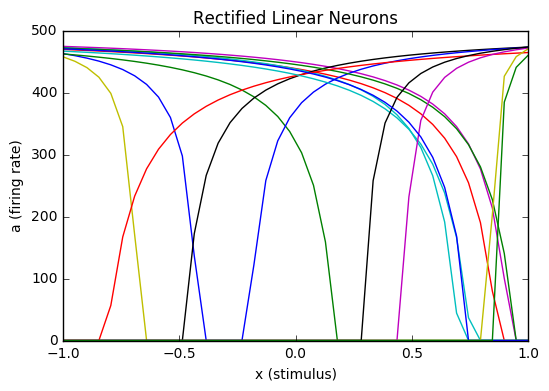

In [592]:
n = 16
stepSize = 0.05
X = np.linspace(-1,1,2/stepSize)
A = initLIFNeurons(n,X, tau_ref = 0.002, tau_rc = 0.02)

for i in range(0,n): #for each neuron
    plot(X, A[i])
xlabel('x (stimulus)')
ylabel('a (firing rate)')
title('Rectified Linear Neurons');

## WHY DO THESE GO SO HIGH?

<ol style="list-style:lower-alpha outside none;" start="2">
<li> [2 marks] Generate the same plots as 1.1e), and report the RMSE for both.
</li>
</ol>

## 2) Representation of Vectors

### 2.1) Vector tuning curves

<ol style="list-style:lower-alpha outside none;" start="1">
<li> [1 mark] Plot the tuning curve of an LIF neuron whose 2D preferred direction vector is at an angle of $\theta=-\pi/4$, has an x-intercept at the origin (0,0), and has a maximum firing rate of 100Hz.

<ul><li> Remember that $J=\alpha e \cdot x + J^{bias}$, and both $x$ and $e$ are 2D vectors.</li>
<li> This is a 3D plot similar to figure 2.8a in the book.</li>
<li> In the scalar case (that you did in question 1.1a), the maximum firing rate occurred when $x=1$ for neurons with $e=1$ and at $x=-1$ for neurons with $e=-1$.  Of course, if the graph in 1.1a was extended to $x>1$ (or $x<-1$), neurons would start firing faster than their maximum firing rate.  Similarly, here the "maximum firing rate" means the firing rate when $x=e$.  This should allow you to reuse your code from 1.3a) to compute $\alpha$ and $J^{bias}$ for a desired maximum firing rate and x-intercept.</li>
<li> To generate 3D plots in MATLAB, see [here](http://www.mathworks.com/help/matlab/learn_matlab/creating-mesh-and-surface-plots.html)</li>
<li> To generate 3D plots in Python, see [here](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)</li>
</ul>
</li>
</ol>

<ol style="list-style:lower-alpha outside none;" start="2">
<li> [1 mark] Plot the tuning curve for the same neuron as in a), but only considering the points around the unit circle.  This will be similar to Figure 2.8b in the book.  Fit a curve of the form $Acos(B\theta+C)+D$ to the tuning curve and plot it as well.  What makes a cosine a good choice for this?  Why does it differ from the ideal curve?
<ul><li> To do curve fitting in MATLAB, see [here](http://www.mathworks.com/help/optim/ug/lsqcurvefit.html).</li>
<li> To do curve fitting in Python, see [here](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).</li>
</ul>
</li>
</ol>

### 2.2 Vector representation

<ol style="list-style:lower-alpha outside none;" start="1">
<li> [1 mark] Generate a set of 100 random unit vectors uniformly distributed around the unit circle.  These will be the encoders $e$ for 100 neurons.  Plot these vectors.
</li>
</ol>

<ol style="list-style:lower-alpha outside none;" start="2">
<li> [1 mark] Compute the optimal decoders.  Use LIF neurons with the same properties as in question 1.3.  When computing the decoders, take into account noise with $\sigma$ as 0.2 times the maximum firing rate.  Plot the decoders.  How do these decoding vectors compare to the encoding vectors?
<ul><li> Note that the decoders will also be 2D vectors.</li>
<li>In the scalar case, you used $x$ values between -1 and 1, with $dx=0.05$.  In this case, you can regularly tile the 2D $x$ values ([1, 1], [1, 0.95], ... [-1, -0.95], [-1, 1]).  Alternatively, you can just randomly choose 1600 different $x$ values to sample. </li>
</li>
</ol>

<ol style="list-style:lower-alpha outside none;" start="3">
<li> [1 mark] Generate 20 random $x$ values over the unit circle (i.e. with different directions and radiuses).  For each $x$ value, determine the neural activity $a$ for each of the 100 neurons.  Now decode these values (i.e. compute $\hat{x}$) using the decoders from part b).  Plot the original and decoded values on the same graph in different colours, and compute the RMSE.
</li>
</ol>

<ol style="list-style:lower-alpha outside none;" start="4">
<li> [2 marks] Repeat part c) but use the *encoders* as decoders.  This is what Georgopoulos used in his original approach to decoding information from populations of neurons.  Plot the decoded values this way and compute the RMSE.  In addition, recompute the RMSE in both cases, but ignoring the magnitude of the decoded vector.  What are the relative merits of these two approaches to decoding?
<ul><li>To ignore the magnitude of the vectors, normalize the length of the decoded vectors before computing the RMSE.</li>
</ul>
</li>
</ol>